**importing libraries**

In [1]:
import matplotlib.pyplot as plt ##to show how our model has performed
from glob import glob ##to create list of  all files in a directory
import cv2 ## to read and manipulations on image
import random
import os
%matplotlib inline
##to show plots inline



from tensorflow.keras.preprocessing.image import ImageDataGenerator##for preprocessing
from tensorflow.keras.layers import Dense,Input,Dropout,Flatten,Conv2D
from tensorflow.keras.layers import BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG
import tensorflow as tf

print("tensorflow version:",tf.__version__)

tensorflow version: 2.14.0


**testing**

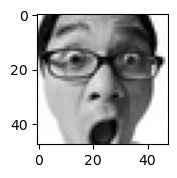

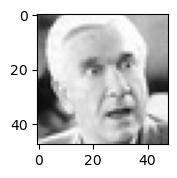

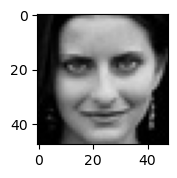

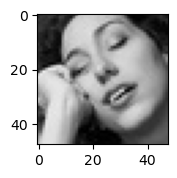

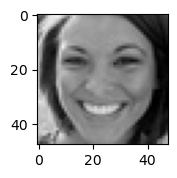

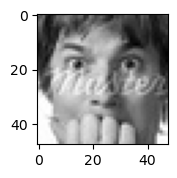

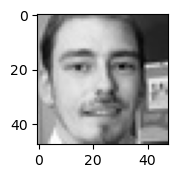

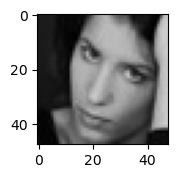

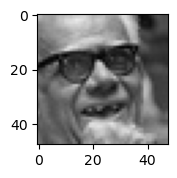

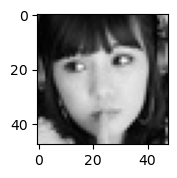

In [2]:
images=glob("train/**/**")
for i in range(10):
    image=random.choice(images)
    plt.figure(figsize=(20,20))
    plt.subplot(10,1,i+1)
    plt.imshow(cv2.imread(image))
    
    

**Data preparation**

In [3]:
img_size=48
batch_size=64
datagen_train=ImageDataGenerator()
train_gen=datagen_train.flow_from_directory("train/",
                                     target_size=(img_size,img_size),
                                     color_mode="grayscale",
                                     batch_size=batch_size,
                                     class_mode="categorical",
                                     shuffle=True)
datagen_test=ImageDataGenerator()
test_gen=datagen_test.flow_from_directory("test/",
                                     target_size=(img_size,img_size),
                                     color_mode="grayscale",
                                     batch_size=batch_size,
                                     class_mode="categorical",
                                     shuffle=True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


**model definition**

In [4]:
def Convolution(input_tensor,filters,kernel_size):
    x=Conv2D(filters=filters,kernel_size=kernel_size,padding="same")(input_tensor)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=MaxPooling2D(pool_size=(2,2))(x)
    x=Dropout(0.25)(x)
    
    return x

    
    

In [5]:
def Dense_f(input_tensor,nodes):
    x=Dense(nodes)(input_tensor)
    
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=Dropout(0.25)(x)
    
    return x

    
    

In [11]:
def model_fer(input_shape):
    inputs=Input(input_shape)
    conv_1=Convolution(inputs,32,(3,3))
    conv_2=Convolution(inputs,64,(5,5))
    conv_3=Convolution(inputs,128,(3,3))
    
    flatten=Flatten()(conv_3)
    
    dense_1=Dense_f(flatten,256)
    
    output=Dense(7,activation="softmax")(dense_1)
    model=Model(inputs=[inputs],outputs=[output])
    model.compile(loss=['categorical_crossentropy'],optimizer='adam',metrics=['accuracy'])
    
    return model


In [12]:
model=model_fer((48,48,1))
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 48, 48, 128)       1280      
                                                                 
 batch_normalization_6 (Bat  (None, 48, 48, 128)       512       
 chNormalization)                                                
                                                                 
 activation_6 (Activation)   (None, 48, 48, 128)       0         
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 24, 24, 128)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 128)       0   

**initializing model**

In [13]:
epochs=15
steps_per_epoch=train_gen.n//train_gen.batch_size
validation_steps=test_gen.n//test_gen.batch_size

checkpoint=ModelCheckpoint("model_weights.h5",monitor='val_accuracy',save_weights_only=True,mode='max',verbose=1)
callbacks=[checkpoint]


**training model**

In [14]:
history=model.fit(
x=train_gen,
steps_per_epoch=steps_per_epoch,
epochs=epochs,
validation_data=test_gen,
validation_steps=validation_steps,
callbacks=callbacks)

    

Epoch 1/15
448/448 [==============================] - ETA: 0s - loss: 1.6513 - accuracy: 0.3730
Epoch 1: saving model to model_weights.h5
448/448 [==============================] - 789s 2s/step - loss: 1.6513 - accuracy: 0.3730 - val_loss: 1.7258 - val_accuracy: 0.3528
Epoch 2/15
448/448 [==============================] - ETA: 0s - loss: 1.3571 - accuracy: 0.4857
Epoch 2: saving model to model_weights.h5
448/448 [==============================] - 326s 728ms/step - loss: 1.3571 - accuracy: 0.4857 - val_loss: 1.5893 - val_accuracy: 0.3662
Epoch 3/15
214/448 [=============>................] - ETA: 2:30 - loss: 1.1797 - accuracy: 0.5552

KeyboardInterrupt: 

**model evaluation**

In [ ]:
model.evaluate(test_gen)


**plotting loss**

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.lengend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.lengend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)


**saving model**

In [ ]:
model_json=model.to_json()
with open('model_architecture.json',"w") as json_file:
    json_file.write(model_json)